In [1]:
import numpy as np
import geopandas as gpd
import folium
from sentinelsat.sentinel import SentinelAPI, read_geojson, geojson_to_wkt
import matplotlib.pyplot as plt


In [2]:
#Plot a boundary in WGS 84 EPSG code 4326 on a folium slipping map
m = folium.Map([28.3949, 84.1240], zoom_start=7)
boundsdata = r'map.geojson'
folium.GeoJson(boundsdata).add_to(m)
m

In [3]:
#Connect to OpenAccessHub
user = 'wfp2019' 
password = 'wfp2019#' 

api = SentinelAPI(user, password, 'https://scihub.copernicus.eu/dhus')


In [4]:
#Search by polygon
footprint = geojson_to_wkt(read_geojson(boundsdata))

print (footprint)


POLYGON((80.9143 30.2401,80.7825 30.0501,80.6177 29.9549,80.3979 29.8025,80.3979 29.6212,80.3101 29.3247,80.1562 29.1234,80.0574 28.8735,80.5078 28.5942,80.5408 28.7195,81.2109 28.3527,81.3318 28.1592,81.4197 28.1786,81.8811 27.8779,82.0020 27.9750,82.4414 27.6933,82.6831 27.6933,82.7380 27.5180,82.9028 27.5083,83.1885 27.4595,83.2983 27.3327,83.4192 27.4888,83.8367 27.4303,84.1113 27.5180,84.2761 27.3718,84.6057 27.3425,84.6606 27.0396,85.1770 26.8437,85.2539 26.7652,85.6384 26.8633,85.8691 26.5787,86.0229 26.6573,86.3086 26.6180,86.8799 26.5001,87.0667 26.5787,87.3523 26.3722,87.4951 26.4411,87.6050 26.3820,87.6929 26.4509,87.7917 26.4607,87.8906 26.4607,87.9675 26.3820,88.1323 26.5787,88.1543 26.8241,88.0664 27.0004,87.9895 27.2156,88.0334 27.4985,88.1543 27.7419,88.1213 27.8682,87.8357 27.9459,87.5610 27.8294,87.2754 27.8585,87.0227 27.9362,86.7261 28.0914,86.5833 28.0914,86.4404 27.9071,86.1877 28.1495,86.1108 27.9362,85.9790 27.9459,85.6934 28.3721,85.6055 28.2657,85.4297 28.3334

In [5]:
#Search for images that fall with the date range 01 Jan 2018 - 31 Dec 2018, we want sentinel 2 level2A and cloud cover of 0-30%

products = api.query(footprint,
                     date = ('20181001', '20181231'),                     
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-2A',
                     cloudcoverpercentage = (0, 30))

In [6]:
print(len(products))


96


In [7]:
#Show results in a table
api.to_geodataframe(products)


,title,link,link_alternative,link_icon,summary,ingestiondate,beginposition,endposition,orbitnumber,relativeorbitnumber,...,platformidentifier,orbitdirection,platformserialidentifier,processingbaseline,processinglevel,producttype,platformname,size,uuid,geometry
013b5503-6607-4151-8606-0fb0ae10245c,S2A_MSIL2A_20181229T045211_N0211_R076_T45RVL_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2018-12-29T04:52:11.024Z, Instrument: MS...",2018-12-29 09:26:04.516,2018-12-29 04:52:11.024,2018-12-29 04:52:11.024,18377,76,...,2015-028A,DESCENDING,Sentinel-2A,02.11,Level-2A,S2MSI2A,Sentinel-2,1.09 GB,013b5503-6607-4151-8606-0fb0ae10245c,"POLYGON ((85.98235868655983 28.02166745577606,..."
060c0e03-58bf-4fdc-ad71-b492145b538a,S2A_MSIL2A_20181218T052221_N0211_R062_T44RLS_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2018-12-18T05:22:21.024Z, Instrument: MS...",2018-12-18 10:04:03.652,2018-12-18 05:22:21.024,2018-12-18 05:22:21.024,18220,62,...,2015-028A,DESCENDING,Sentinel-2A,02.11,Level-2A,S2MSI2A,Sentinel-2,1.10 GB,060c0e03-58bf-4fdc-ad71-b492145b538a,"POLYGON ((78.94856806237456 28.9126538873101, ..."
078c1f96-12ee-4a28-bbfc-a1261e889af4,S2B_MSIL2A_20181220T051219_N0211_R019_T44RPR_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2018-12-20T05:12:19.024Z, Instrument: MS...",2018-12-20 12:41:36.623,2018-12-20 05:12:19.024,2018-12-20 05:12:19.024,9340,19,...,2017-013A,DESCENDING,Sentinel-2B,02.11,Level-2A,S2MSI2A,Sentinel-2,1.06 GB,078c1f96-12ee-4a28-bbfc-a1261e889af4,"POLYGON ((83.11640034621703 27.10916575752936,..."
07a9fc2c-229b-430f-b8ba-d26f33042307,S2B_MSIL2A_20181223T052229_N0211_R062_T44RNT_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2018-12-23T05:22:29.024Z, Instrument: MS...",2018-12-23 13:01:25.836,2018-12-23 05:22:29.024,2018-12-23 05:22:29.024,9383,62,...,2017-013A,DESCENDING,Sentinel-2B,02.11,Level-2A,S2MSI2A,Sentinel-2,264.95 MB,07a9fc2c-229b-430f-b8ba-d26f33042307,"POLYGON ((81.35190314694695 29.82895334814479,..."
08cd792a-d59b-4071-9fa0-88eadf9d136d,S2B_MSIL2A_20181227T050219_N0211_R119_T44RQR_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2018-12-27T05:02:19.024Z, Instrument: MS...",2018-12-27 15:34:10.294,2018-12-27 05:02:19.024,2018-12-27 05:02:19.024,9440,119,...,2017-013A,DESCENDING,Sentinel-2B,02.11,Level-2A,S2MSI2A,Sentinel-2,1.04 GB,08cd792a-d59b-4071-9fa0-88eadf9d136d,"POLYGON ((83.03366975023373 28.01038669620816,..."
09080eda-1bcf-49ca-ab6a-99a161e22dcf,S2B_MSIL2A_20181224T045219_N0211_R076_T45RTK_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2018-12-24T04:52:19.024Z, Instrument: MS...",2018-12-24 15:15:53.877,2018-12-24 04:52:19.024,2018-12-24 04:52:19.024,9397,76,...,2017-013A,DESCENDING,Sentinel-2B,02.11,Level-2A,S2MSI2A,Sentinel-2,124.07 MB,09080eda-1bcf-49ca-ab6a-99a161e22dcf,"POLYGON ((84.86310927649379 26.11453344919078,..."
0a29754a-33dd-419c-a25e-01ad659a702e,S2A_MSIL2A_20181215T051211_N0211_R019_T44RNR_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2018-12-15T05:12:11.024Z, Instrument: MS...",2018-12-15 10:14:27.968,2018-12-15 05:12:11.024,2018-12-15 05:12:11.024,18177,19,...,2015-028A,DESCENDING,Sentinel-2A,02.11,Level-2A,S2MSI2A,Sentinel-2,1.10 GB,0a29754a-33dd-419c-a25e-01ad659a702e,"POLYGON ((80.9997965400

In [9]:
print (areas)

                                                                                  title  \
013b5503-6607-4151-8606-0fb0ae10245c  S2A_MSIL2A_20181229T045211_N0211_R076_T45RVL_2...   
060c0e03-58bf-4fdc-ad71-b492145b538a  S2A_MSIL2A_20181218T052221_N0211_R062_T44RLS_2...   
078c1f96-12ee-4a28-bbfc-a1261e889af4  S2B_MSIL2A_20181220T051219_N0211_R019_T44RPR_2...   
07a9fc2c-229b-430f-b8ba-d26f33042307  S2B_MSIL2A_20181223T052229_N0211_R062_T44RNT_2...   
08cd792a-d59b-4071-9fa0-88eadf9d136d  S2B_MSIL2A_20181227T050219_N0211_R119_T44RQR_2...   
09080eda-1bcf-49ca-ab6a-99a161e22dcf  S2B_MSIL2A_20181224T045219_N0211_R076_T45RTK_2...   
0a29754a-33dd-419c-a25e-01ad659a702e  S2A_MSIL2A_20181215T051211_N0211_R019_T44RNR_2...   
0e904b01-8df9-4894-ae64-f4bff68143ad  S2B_MSIL2A_20181227T050219_N0211_R119_T44RPR_2...   
1384c2ab-795f-4f82-9f7a-e06da39dbd16  S2B_MSIL2A_20181221T044209_N0211_R033_T45RWK_2...   
15e4aaeb-801f-45b9-a8f1-0b4ad2096450  S2B_MSIL2A_20181220T051219_N0211_R019_T44RNS_2...   

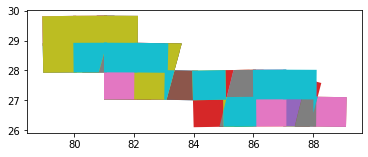

In [8]:
#Plot the table as a GeoPandas dataframe, based on the uuid field
areas = api.to_geodataframe(products)
areas.plot(column='uuid', cmap=None)

013b5503-6607-4151-8606-0fb0ae10245c    Annotation(86.5429, 27.5287, '013b5503-6607-41...
060c0e03-58bf-4fdc-ad71-b492145b538a    Annotation(79.5185, 28.4243, '060c0e03-58bf-4f...
078c1f96-12ee-4a28-bbfc-a1261e889af4    Annotation(82.5679, 27.521, '078c1f96-12ee-4a2...
07a9fc2c-229b-430f-b8ba-d26f33042307    Annotation(81.1228, 29.4393, '07a9fc2c-229b-43...
08cd792a-d59b-4071-9fa0-88eadf9d136d    Annotation(83.5799, 27.5055, '08cd792a-d59b-40...
09080eda-1bcf-49ca-ab6a-99a161e22dcf    Annotation(85.0144, 26.4156, '09080eda-1bcf-49...
0a29754a-33dd-419c-a25e-01ad659a702e    Annotation(81.5557, 27.5283, '0a29754a-33dd-41...
0e904b01-8df9-4894-ae64-f4bff68143ad    Annotation(82.9009, 27.4729, '0e904b01-8df9-48...
1384c2ab-795f-4f82-9f7a-e06da39dbd16    Annotation(87.8008, 26.591, '1384c2ab-795f-4f8...
15e4aaeb-801f-45b9-a8f1-0b4ad2096450    Annotation(81.5604, 28.4312, '15e4aaeb-801f-45...
16a9fe2d-c107-40b0-9e20-31ac498e2699    Annotation(86.5465, 26.6257, '16a9fe2d-c107-40...
176401bf-f

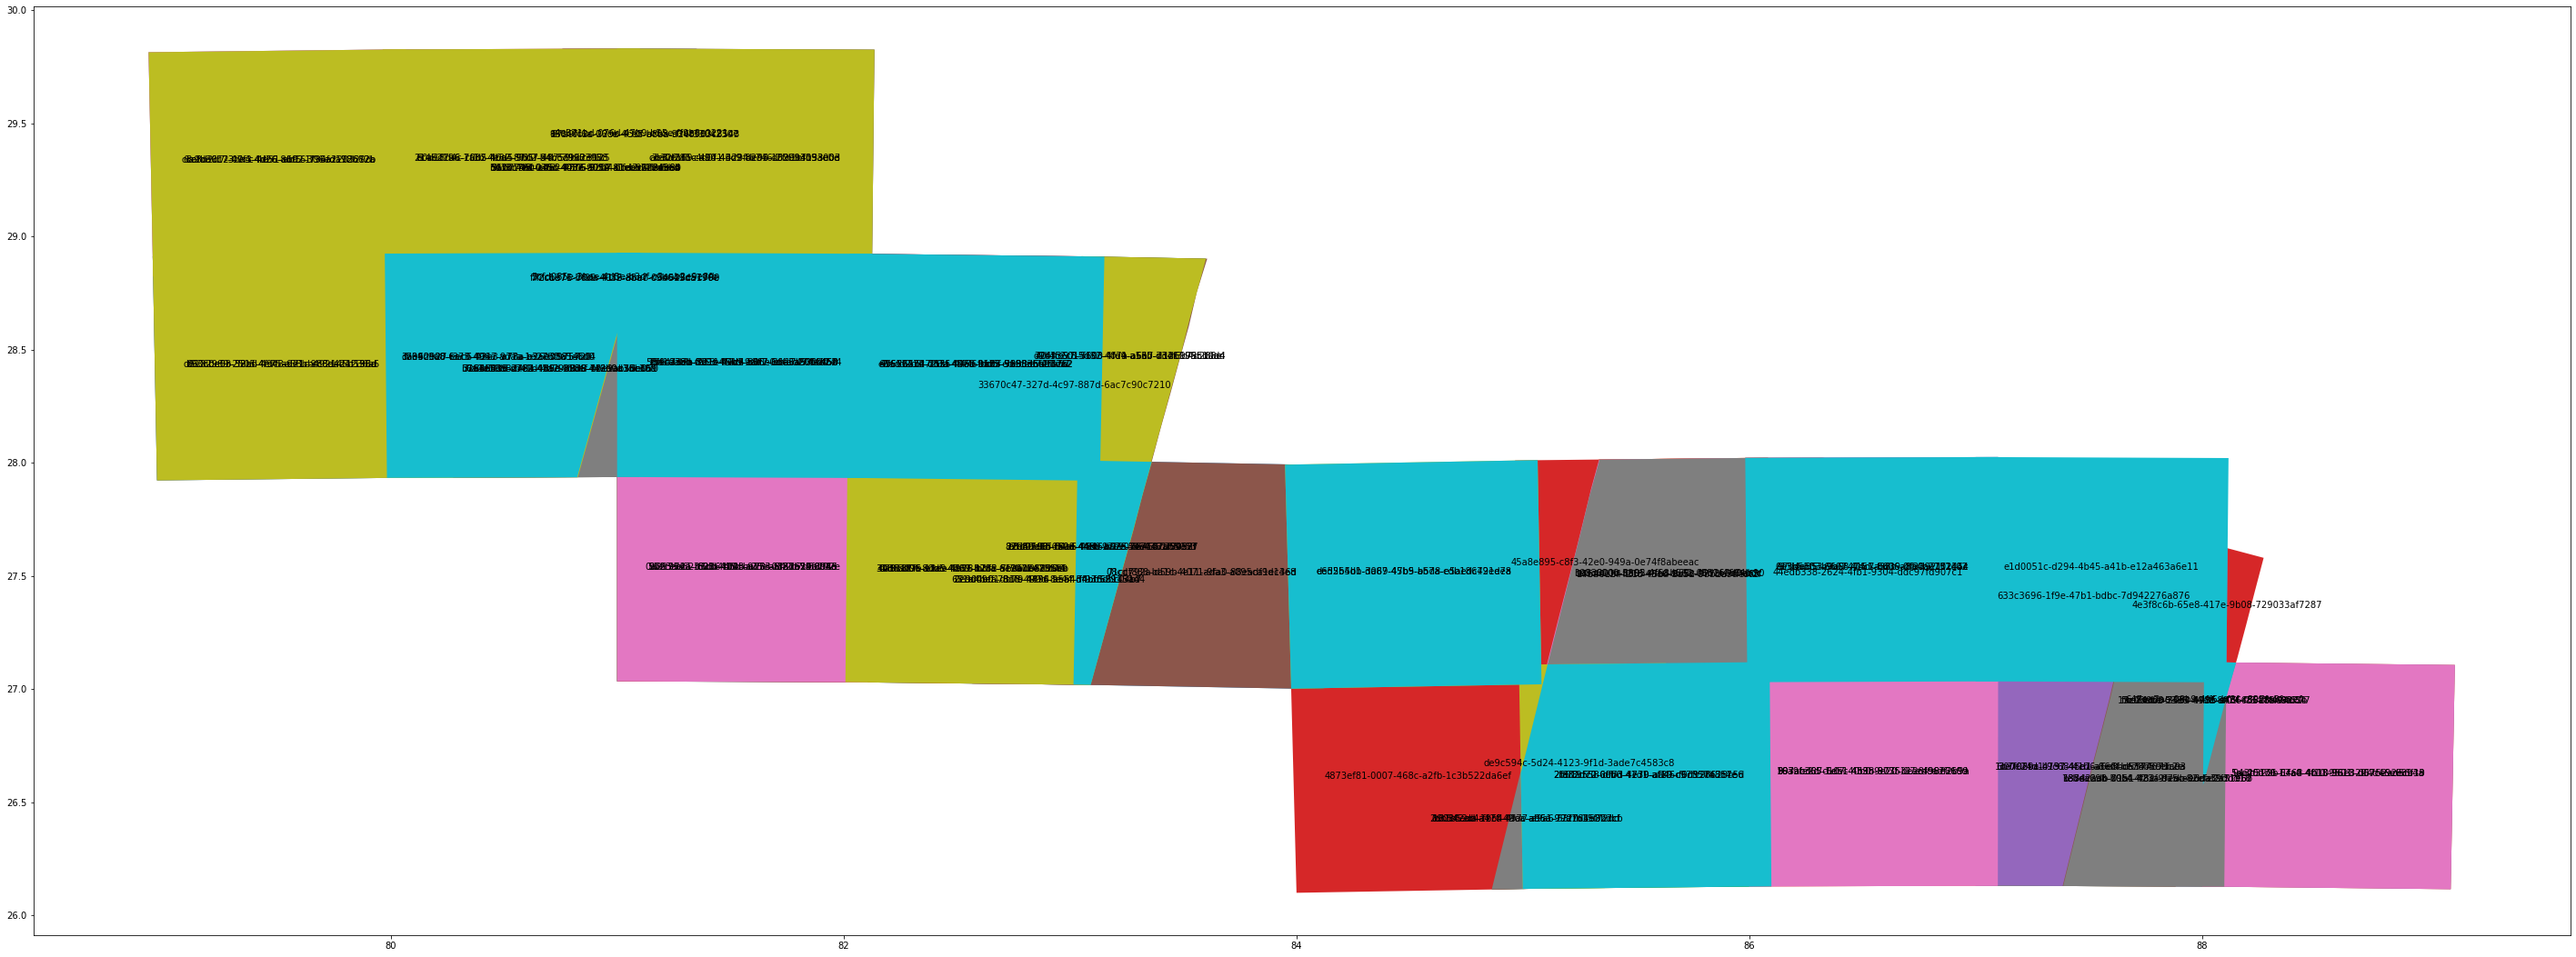

In [10]:
#Label the polygons
ax = areas.plot(column='uuid', cmap=None, figsize=(50, 50))
areas.apply(lambda x: ax.annotate(s=x.uuid, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)


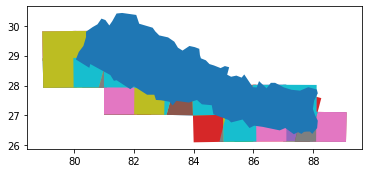

In [11]:
#use geopandas to check which scene to download
gdf2 = gpd.read_file(boundsdata)
f, ax = plt.subplots(1)
areas.plot(ax=ax,column='uuid',cmap=None,)
gdf2.plot(ax=ax)
plt.show()


In [12]:
#Get the uuid and inspect produuct data
api.get_product_odata('ded255bb-3a87-45b9-ab7a-cdb186791e7a')


{'id': 'ded255bb-3a87-45b9-ab7a-cdb186791e7a',
 'title': 'S2B_MSIL2A_20181227T050219_N0211_R119_T45RTL_20181227T081544',
 'size': 1114177112,
 'md5': '49B923DE1E55FAECF7662D0512E66DD9',
 'date': datetime.datetime(2018, 12, 27, 5, 2, 19, 24000),
 'footprint': 'POLYGON((83.94966291515031 27.991577831689415,85.06534249241301 28.011816421914702,85.08260664643534 27.02111225850134,83.9768526405984 27.001706217086564,83.94966291515031 27.991577831689415))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('ded255bb-3a87-45b9-ab7a-cdb186791e7a')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2018, 12, 27, 15, 45, 41, 372000),
 'Ingestion Date': datetime.datetime(2018, 12, 27, 15, 26, 3, 899000)}

In [13]:
#Download the data
api.download('ded255bb-3a87-45b9-ab7a-cdb186791e7a')


Downloading: 100%|██████████| 1.11G/1.11G [28:16<00:00, 846kB/s] 
MD5 checksumming: 100%|██████████| 1.11G/1.11G [00:15<00:00, 73.0MB/s]


{'id': 'ded255bb-3a87-45b9-ab7a-cdb186791e7a',
 'title': 'S2B_MSIL2A_20181227T050219_N0211_R119_T45RTL_20181227T081544',
 'size': 1114177112,
 'md5': '49B923DE1E55FAECF7662D0512E66DD9',
 'date': datetime.datetime(2018, 12, 27, 5, 2, 19, 24000),
 'footprint': 'POLYGON((83.94966291515031 27.991577831689415,85.06534249241301 28.011816421914702,85.08260664643534 27.02111225850134,83.9768526405984 27.001706217086564,83.94966291515031 27.991577831689415))',
 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('ded255bb-3a87-45b9-ab7a-cdb186791e7a')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2018, 12, 27, 15, 45, 41, 372000),
 'Ingestion Date': datetime.datetime(2018, 12, 27, 15, 26, 3, 899000),
 'path': './S2B_MSIL2A_20181227T050219_N0211_R119_T45RTL_20181227T081544.zip',
 'downloaded_bytes': 708378200}

In [15]:
!ls

 data.ipynb
 esiafrica_1980.csv
 esiafrica.csv
 map.geojson
 NLP_.ipynb
 nsenergy_1490.csv
 nsenergy_990.csv
 nsenergy.csv
'Omdena - Sentinel2- Data Download (1).ipynb'
'Omdena - Sentinel2- Data Download.ipynb'
 S2B_MSIL2A_20181227T050219_N0211_R119_T45RTL_20181227T081544.zip
 scrap.ipynb
 scrap_news.ipynb
 tensorinpytorch.ipynb
'Transaction Data - combined.csv'
'Untitled Folder'
 Untitled.ipynb
 ward_clusters.png


In [16]:
import zipfile # https://stackoverflow.com/questions/3451111/unzipping-files-in-python
zip_ref = zipfile.ZipFile("S2B_MSIL2A_20181227T050219_N0211_R119_T45RTL_20181227T081544.zip", 'r')
zip_ref.extractall('.')
zip_ref.close()

In [18]:
!ls

 data.ipynb
 esiafrica_1980.csv
 esiafrica.csv
 map.geojson
 NLP_.ipynb
 nsenergy_1490.csv
 nsenergy_990.csv
 nsenergy.csv
'Omdena - Sentinel2- Data Download (1).ipynb'
'Omdena - Sentinel2- Data Download.ipynb'
 S2B_MSIL2A_20181227T050219_N0211_R119_T45RTL_20181227T081544.SAFE
 S2B_MSIL2A_20181227T050219_N0211_R119_T45RTL_20181227T081544.zip
 scrap.ipynb
 scrap_news.ipynb
 tensorinpytorch.ipynb
'Transaction Data - combined.csv'
'Untitled Folder'
 Untitled.ipynb
 ward_clusters.png


In [19]:
!ls ./S2B_MSIL2A_20181227T050219_N0211_R119_T45RTL_20181227T081544.SAFE/

AUX_DATA   GRANULE  INSPIRE.xml    MTD_MSIL2A.xml
DATASTRIP  HTML     manifest.safe  rep_info


In [45]:
image_path = "~/snap/pycharm-community/common/dntdel/S2B_MSIL2A_20181227T050219_N0211_R119_T45RTL_20181227T081544.SAFE/GRANULE/L2A_T45RTL_A009440_20181227T050759/IMG_DATA/R10m/"

In [34]:
!ls ~/snap/pycharm-community/common/dntdel/S2B_MSIL2A_20181227T050219_N0211_R119_T45RTL_20181227T081544.SAFE/GRANULE/L2A_T45RTL_A009440_20181227T050759/IMG_DATA/R10m/

T45RTL_20181227T050219_AOT_10m.jp2  T45RTL_20181227T050219_B08_10m.jp2
T45RTL_20181227T050219_B02_10m.jp2  T45RTL_20181227T050219_TCI_10m.jp2
T45RTL_20181227T050219_B03_10m.jp2  T45RTL_20181227T050219_WVP_10m.jp2
T45RTL_20181227T050219_B04_10m.jp2


In [6]:
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
band2 = rasterio.open("./S2B_MSIL2A_20181227T050219_N0211_R119_T45RTL_20181227T081544.SAFE/GRANULE/L2A_T45RTL_A009440_20181227T050759/IMG_DATA/R10m/T45RTL_20181227T050219_B02_10m.jp2", driver="JP2OpenJPEG") #blue
band3 = rasterio.open("./S2B_MSIL2A_20181227T050219_N0211_R119_T45RTL_20181227T081544.SAFE/GRANULE/L2A_T45RTL_A009440_20181227T050759/IMG_DATA/R10m/T45RTL_20181227T050219_B03_10m.jp2", driver="JP2OpenJPEG") #green
band4 = rasterio.open("./S2B_MSIL2A_20181227T050219_N0211_R119_T45RTL_20181227T081544.SAFE/GRANULE/L2A_T45RTL_A009440_20181227T050759/IMG_DATA/R10m/T45RTL_20181227T050219_B04_10m.jp2", driver="JP2OpenJPEG") #red
band8 = rasterio.open("./S2B_MSIL2A_20181227T050219_N0211_R119_T45RTL_20181227T081544.SAFE/GRANULE/L2A_T45RTL_A009440_20181227T050759/IMG_DATA/R10m/T45RTL_20181227T050219_B08_10m.jp2", driver="JP2OpenJPEG") #red

In [8]:
trueColor = rasterio.open('SentinelTrueColor2.tif','w',driver='Gtiff',
                         width=band4.width, height=band4.height,
                         count=3,
                         crs=band4.crs,
                         transform=band4.transform,
                         dtype=band4.dtypes[0]
                         )
trueColor.write(band2.read(1),3) #blue
trueColor.write(band3.read(1),2) #green
trueColor.write(band4.read(1),1) #red
trueColor.close()

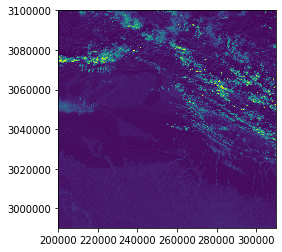

In [53]:
src = rasterio.open(r"SentinelTrueColor2.tiff", count=3)
plot.show(src)

In [2]:
import os, sys
from PIL import Image

In [56]:
# import georasters as gr
# data = gr.from_file('SentinelTrueColor2.tiff')

# plt.imshow(data.raster, cmap='gray')
# plt.show()

ModuleNotFoundError: No module named 'georasters'

In [11]:
!gdalbuildvrt -separate stack.vrt ./S2B_MSIL2A_20181227T050219_N0211_R119_T45RTL_20181227T081544.SAFE/GRANULE/L2A_T45RTL_A009440_20181227T050759/IMG_DATA/R10m/T45RTL_20181227T050219_B04_10m.jp2 ./S2B_MSIL2A_20181227T050219_N0211_R119_T45RTL_20181227T081544.SAFE/GRANULE/L2A_T45RTL_A009440_20181227T050759/IMG_DATA/R10m/T45RTL_20181227T050219_B03_10m.jp2 ./S2B_MSIL2A_20181227T050219_N0211_R119_T45RTL_20181227T081544.SAFE/GRANULE/L2A_T45RTL_A009440_20181227T050759/IMG_DATA/R10m/T45RTL_20181227T050219_B02_10m.jp2

0...10...20...30...40...50...60...70...80...90...100 - done.


In [12]:
!gdal_translate -scale_1 0 1372 -scale_2 0 1397 -scale_3 0 1430 -ot Byte  stack.vrt im_rescaled.tif

Input file size is 10980, 10980
0...10...20...30...40...50...60...70...80...90...100 - done.


In [ ]:
im = Image.open("im_rescaled.tif")

/home/dipesh/.local/lib/python3.6/site-packages/PIL/Image.py:2618: DecompressionBombWarning: Image size (120560400 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)


In [5]:
import os, sys
from osgeo import gdal

dset = gdal.Open("im_rescaled.tif")

width = dset.RasterXSize
height = dset.RasterYSize

print(width, 'x', height)

tilesize = 512

10980 x 10980


In [6]:
for i in range(0, width, tilesize):
    for j in range(0, height, tilesize):
        w = min(i+tilesize, width) - i
        h = min(j+tilesize, height) - j
        gdaltranString = "gdal_translate -of GTIFF -srcwin "+str(i)+", "+str(j)+", "+str(w)+", " \
            +str(h)+" " + "im_rescaled.tif" + " " + "_o_" + "_"+str(i)+"_"+str(j)+".tif"
        os.system(gdaltranString)

In [13]:
from PIL import Image
import numpy 

im = Image.open('_o__1024_2048.tif') 
imarray = numpy.array(im) 
imarray.shape 
im.show()

In [10]:
!ls

 data.ipynb
 esiafrica_1980.csv
 esiafrica.csv
 im_rescaled.tif
 map.geojson
 NLP_.ipynb
 nsenergy_1490.csv
 nsenergy_990.csv
 nsenergy.csv
 _o__0_0.tif
 _o__0_10240.tif
 _o__0_1024.tif
 _o__0_10752.tif
 _o__0_1536.tif
 _o__0_2048.tif
 _o__0_2560.tif
 _o__0_3072.tif
 _o__0_3584.tif
 _o__0_4096.tif
 _o__0_4608.tif
 _o__0_5120.tif
 _o__0_512.tif
 _o__0_5632.tif
 _o__0_6144.tif
 _o__0_6656.tif
 _o__0_7168.tif
 _o__0_7680.tif
 _o__0_8192.tif
 _o__0_8704.tif
 _o__0_9216.tif
 _o__0_9728.tif
 _o__10240_0.tif
 _o__10240_10240.tif
 _o__10240_1024.tif
 _o__10240_10752.tif
 _o__10240_1536.tif
 _o__10240_2048.tif
 _o__10240_2560.tif
 _o__10240_3072.tif
 _o__10240_3584.tif
 _o__10240_4096.tif
 _o__10240_4608.tif
 _o__10240_5120.tif
 _o__10240_512.tif
 _o__10240_5632.tif
 _o__10240_6144.tif
 _o__10240_6656.tif
 _o__10240_7168.tif
 _o__10240_7680.tif
 _o__10240_8192.tif
 _o__10240_8704.tif
 _o__10240_9216.tif
 _o__10240_9728.tif
 _o__1024_0.tif
 _o__1024_10240.tif
 _o__1024_1024.tif
 _o__1024_10752.t

In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 80, 80

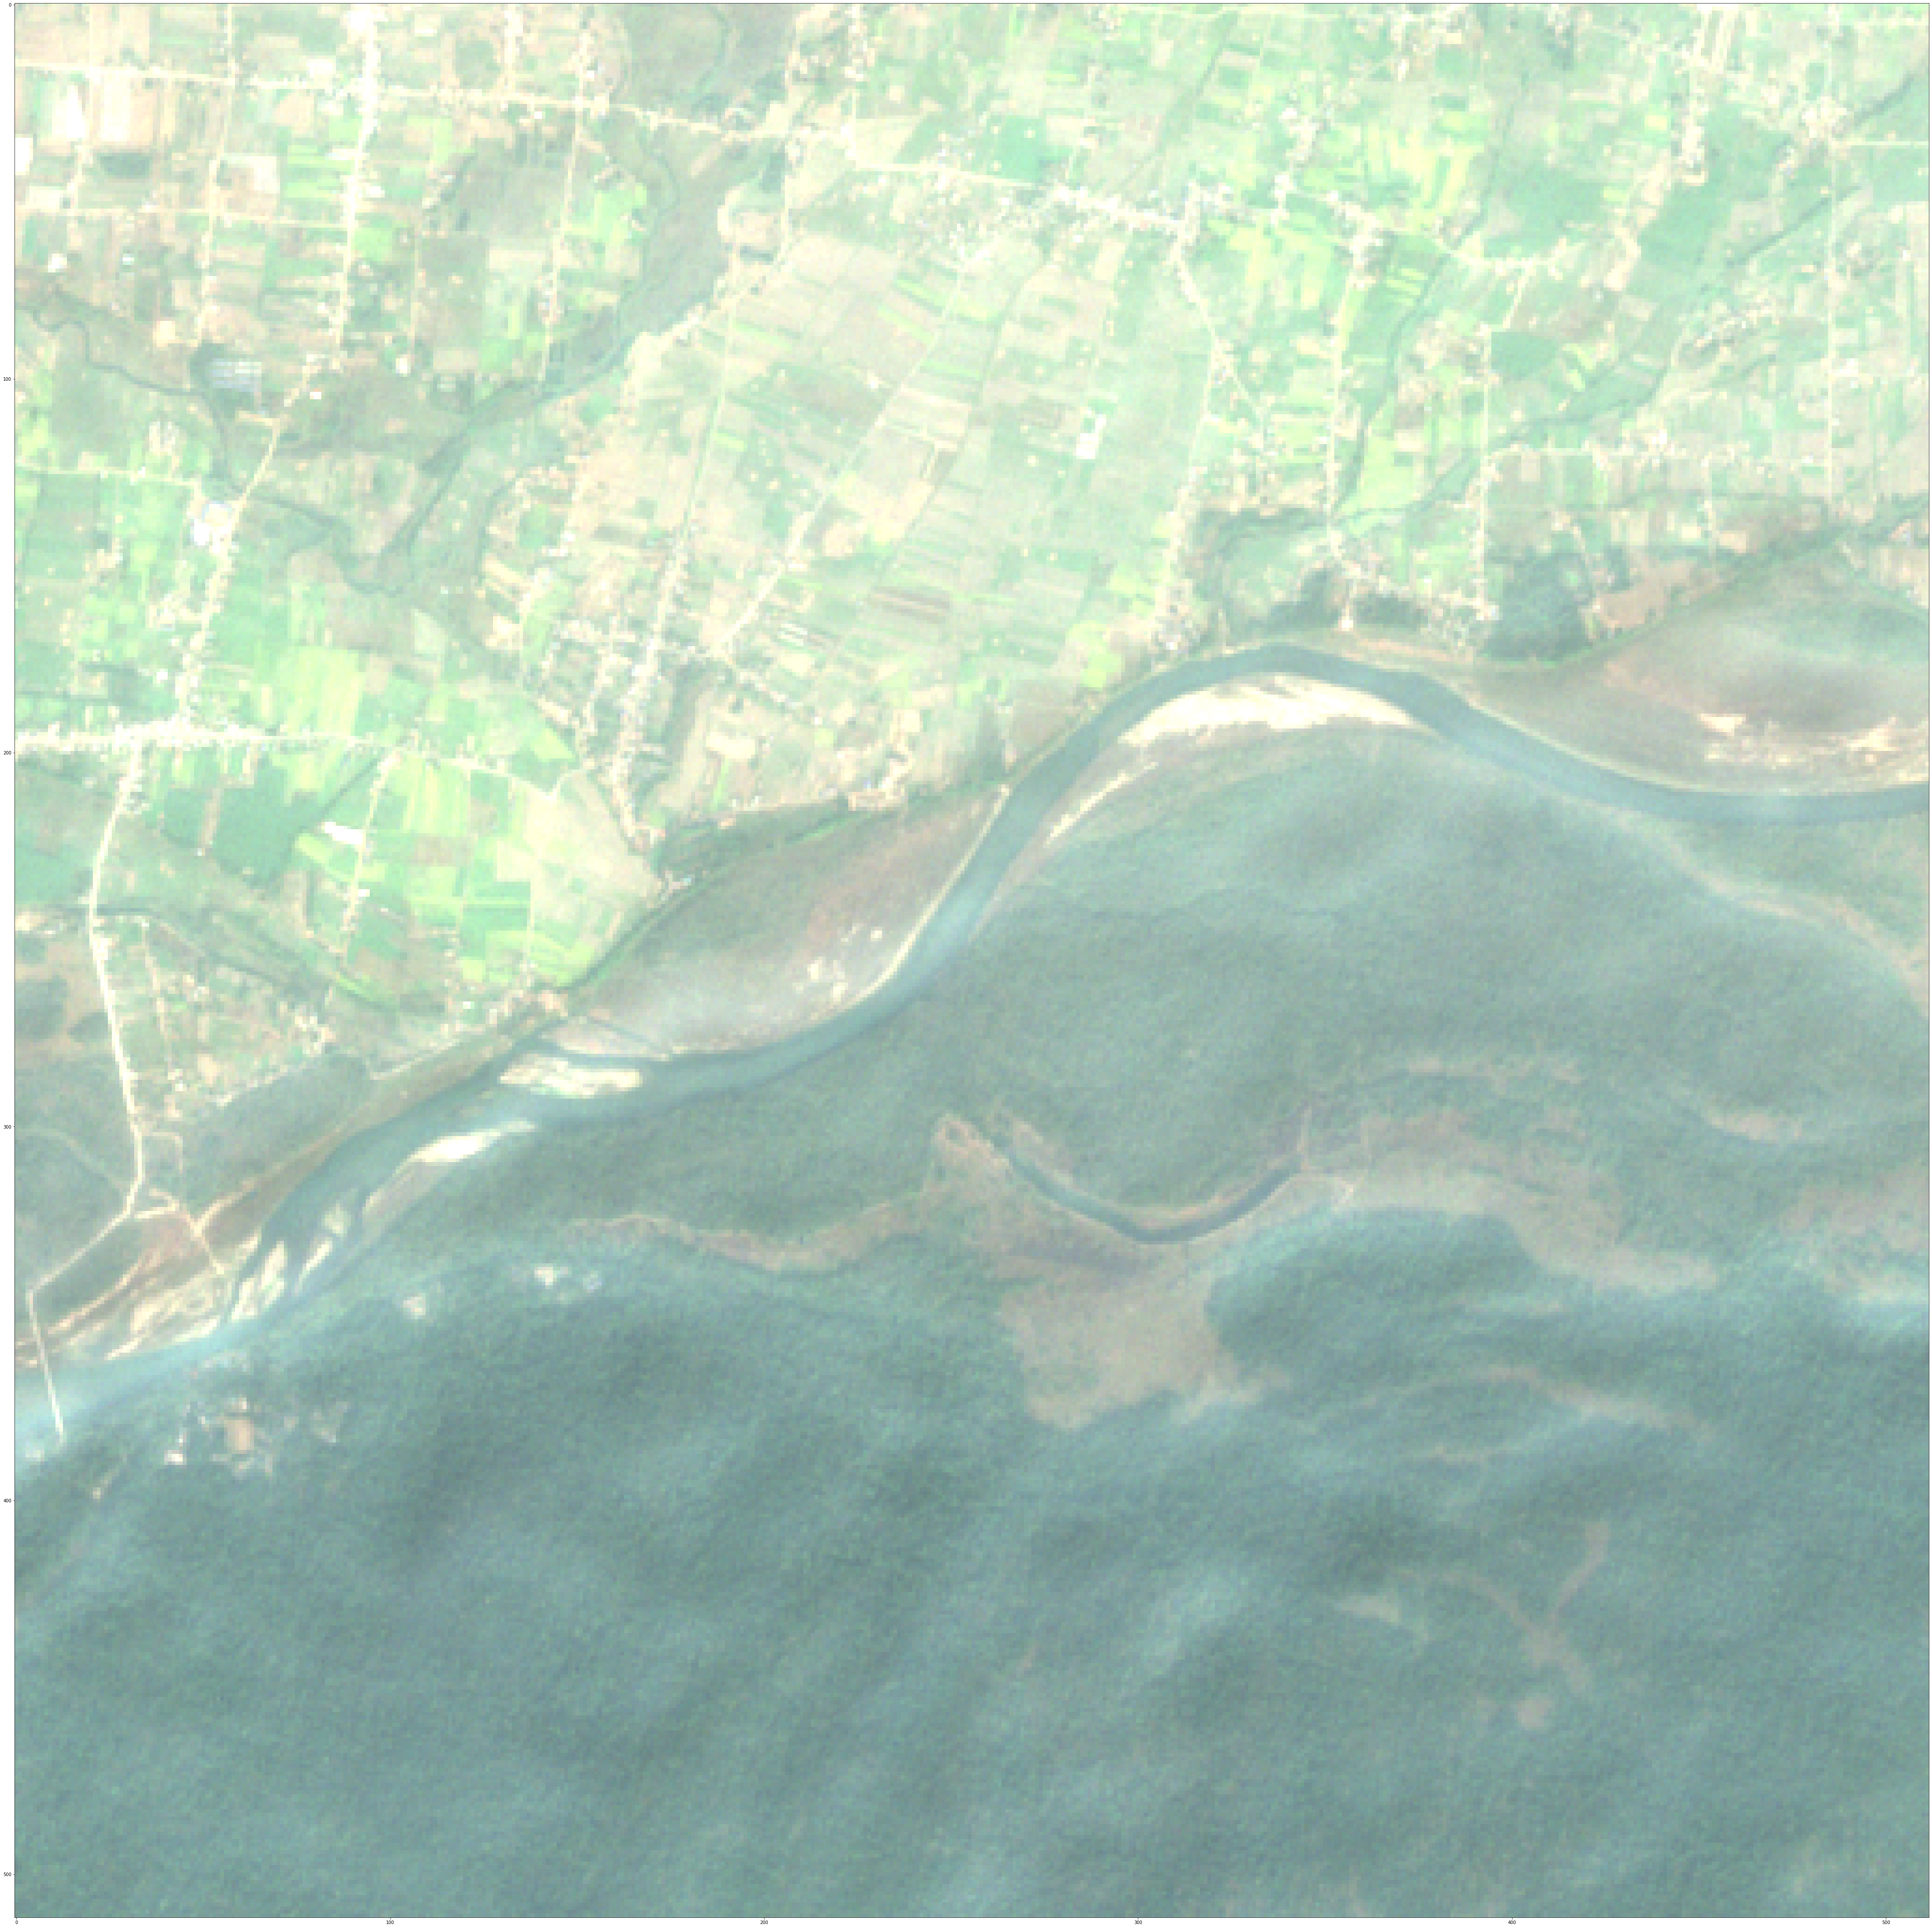

In [31]:
image = mpimg.imread("_o__3584_4608.tif")
plt.imshow(image)
plt.show()

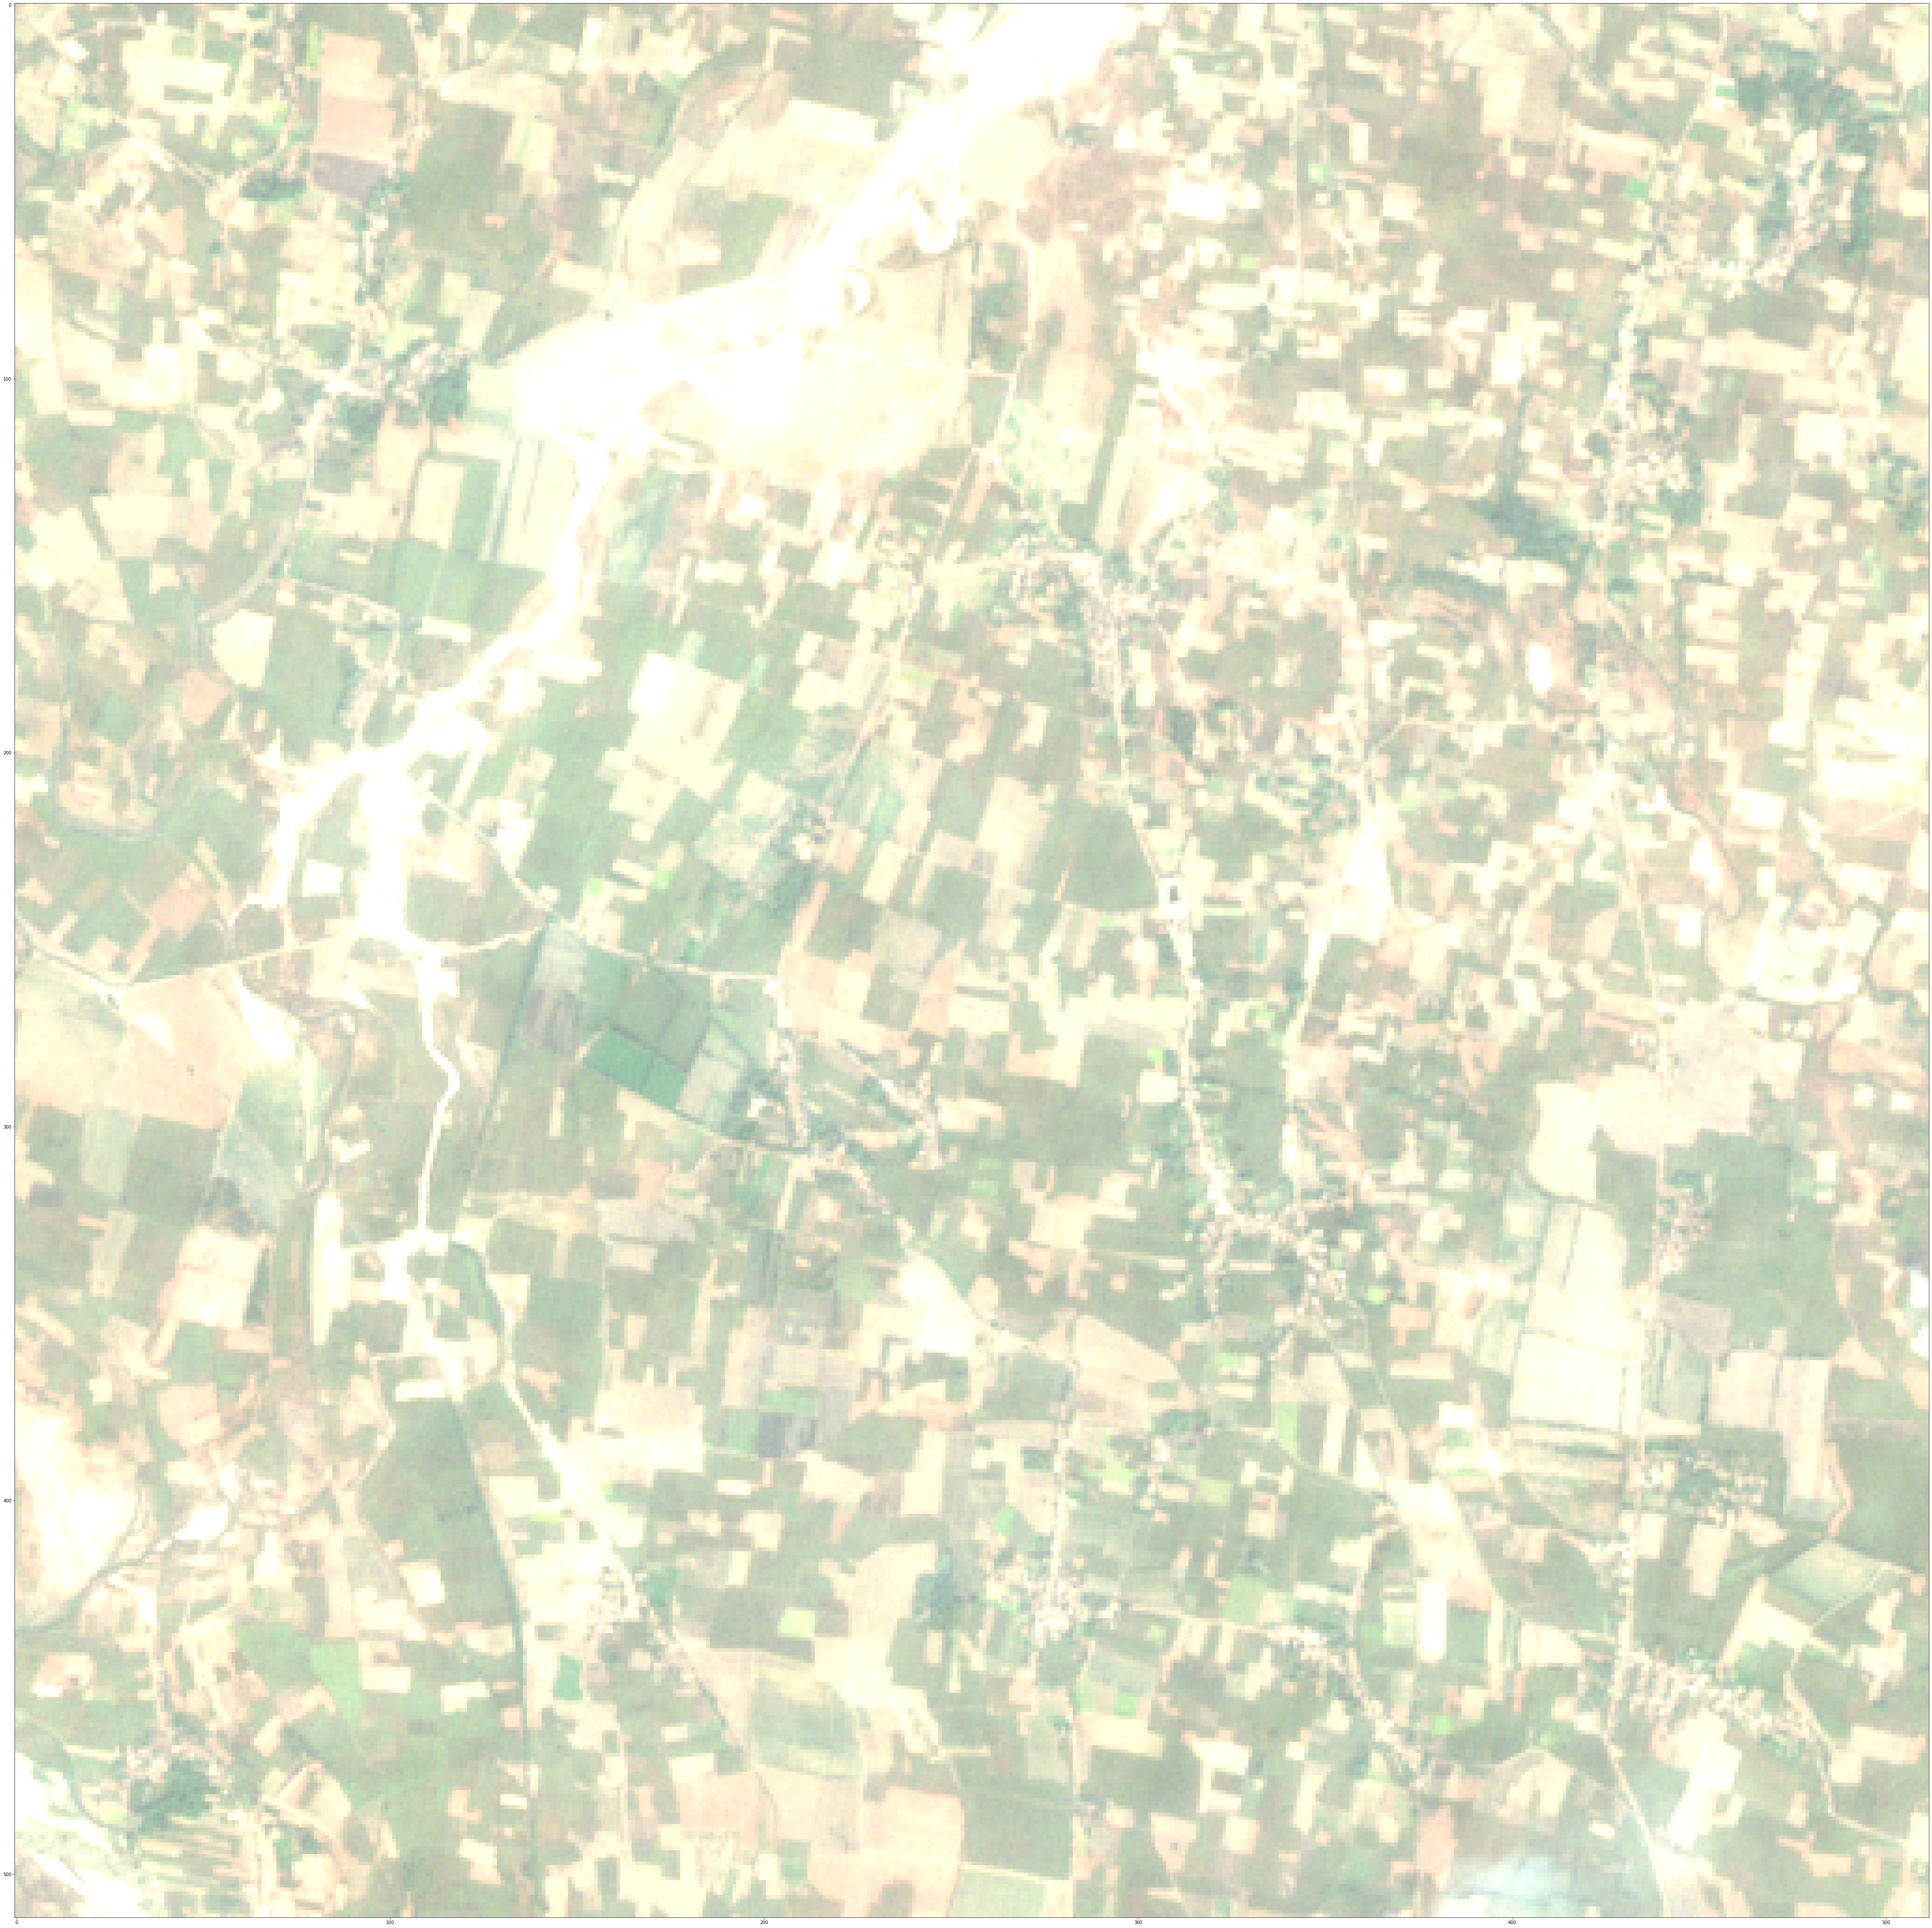

In [32]:
image = mpimg.imread("_o__3072_8192.tif")
plt.imshow(image)
plt.show()